In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [433]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,StratifiedKFold,cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,recall_score,precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.pipeline import Pipeline

In [338]:
df=pd.read_csv('/content/drive/MyDrive/data_pred.csv')

In [5]:
x=df.drop(columns='redemp')

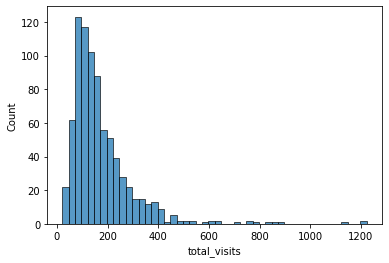

In [6]:
sns.histplot(df['total_visits'])

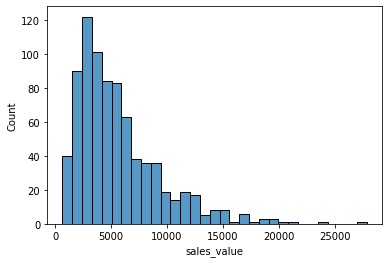

In [7]:
sns.histplot(df['sales_value'])

In [12]:
x=df.drop(columns='redemp')
y=df['redemp']

In [16]:
x.shape

(801, 19)

In [17]:
y.shape

(801,)

In [351]:
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=100)

In [ ]:
mod=LogisticRegression(penalty='none').fit(X_train,y_train)

In [34]:
y_pred=mod.predict(X_test)

In [25]:
y_test

484    1
218    0
589    0
724    1
359    0
      ..
774    0
279    1
632    0
534    0
104    0
Name: redemp, Length: 201, dtype: int64

In [35]:
confusion_matrix(y_test,y_pred)

array([[105,   9],
       [ 56,  31]])

In [36]:
recall_score(y_test,y_pred)

0.3563218390804598

In [ ]:
#Since the numerical data looks like a skewed gaussian distribution, scaling to mean 0 and Sd 0 makes sense

sd=StandardScaler()

X_train[['total_visits','sales_value','age_desc','income_desc','kid_category_desc']]=sd.fit_transform(X_train[['total_visits','sales_value','age_desc','income_desc','kid_category_desc']])
X_test[['total_visits','sales_value','age_desc','income_desc','kid_category_desc']]=sd.fit_transform(X_test[['total_visits','sales_value','age_desc','income_desc','kid_category_desc']])

In [430]:
sd=StandardScaler()
pipeline = Pipeline([('transformera', sd), ('estimator', LogisticRegression())])
estimator__solver = ['newton-cg', 'lbfgs', 'liblinear']
estimator__penalty = ['l2']
estimator__C = [100, 10, 1.0, 0.1, 0.01]
grid = dict(estimator__solver=estimator__solver,estimator__penalty=estimator__penalty,estimator__C=estimator__C)

In [215]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'transformera', 'estimator', 'transformera__copy', 'transformera__with_mean', 'transformera__with_std', 'estimator__C', 'estimator__class_weight', 'estimator__dual', 'estimator__fit_intercept', 'estimator__intercept_scaling', 'estimator__l1_ratio', 'estimator__max_iter', 'estimator__multi_class', 'estimator__n_jobs', 'estimator__penalty', 'estimator__random_state', 'estimator__solver', 'estimator__tol', 'estimator__verbose', 'estimator__warm_start'])

In [431]:
grid_search=GridSearchCV(estimator=pipeline, param_grid=grid, n_jobs=-1, cv=5, scoring='precision',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

In [432]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.583249 using {'estimator__C': 0.01, 'estimator__penalty': 'l2', 'estimator__solver': 'liblinear'}


In [439]:
mod=LogisticRegression(penalty='l2',C=0.01,solver='liblinear').fit(X_train,y_train)
ypred=mod.predict(X_test)
precision_score(y_test,ypred)

0.6744186046511628

In [247]:
def naturalNumbers(n):
    return [i+1 for i in range(n)]

In [440]:
mod=DecisionTreeClassifier()
criterion=['gini','entropy']
splitter=['best','random']
max_depth=naturalNumbers(10)
min_samples_leaf=naturalNumbers(5)
max_features=['auto','sqrt','None','log2']
grid=dict(criterion=criterion,splitter=splitter,max_depth=max_depth,min_samples_leaf=min_samples_leaf,max_features=max_features)

In [448]:
#cv=StratifiedKFold(n_splits=5)
grid_search=GridSearchCV(estimator=mod, param_grid=grid, n_jobs=-1, cv=5, scoring='precision',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

In [442]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.666667 using {'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'splitter': 'random'}


In [450]:
mod=DecisionTreeClassifier(criterion= 'gini', max_depth= 2, max_features= 'auto', min_samples_leaf= 1, splitter= 'random')#,random_state=100)
mod.fit(X_train,y_train)
ypred=mod.predict(X_test)
precision_score(y_test,ypred)

0.6

In [451]:
mod=RandomForestClassifier()
n_estimators = [10,25,50,75,100,150,200,250]
max_features = ['sqrt', 'log2']
criterion=['gini','entropy']
max_depth=[3,5,7,9]
#min_samples_leaf=naturalNumbers(15)
grid=dict(criterion=criterion,max_depth=max_depth,min_samples_leaf=min_samples_leaf,max_features=max_features,n_estimators=n_estimators)

In [ ]:
#cv=StratifiedKFold(n_splits=4)
grid_search=GridSearchCV(estimator=mod, param_grid=grid, n_jobs=-1, cv=5, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

In [399]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.695000 using {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 3, 'n_estimators': 20}


In [410]:
mod=RandomForestClassifier(criterion='entropy',max_depth=7,max_features='log2',min_samples_leaf= 3, n_estimators=20).fit(X_train,y_train)
cross_val_score(mod,x,y,cv=cv,scoring='recall').mean()


0.4855561105561106

In [410]:
#Gradient Boost

In [411]:
mod=GradientBoostingClassifier()
learning_rate = [0, 0.25, 0.5, 0.7, 0.9, 1.0]
max_depth = [3, 7, 9,11]
subsample = [0.5, 0.7, 1.0]
n_estimators = [10,25,50,75,100]
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)

In [412]:
cv=StratifiedKFold(n_splits=4)
grid_search=GridSearchCV(estimator=mod, param_grid=grid, n_jobs=-1, cv=cv, scoring='recall',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

In [413]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.647321 using {'learning_rate': 1.0, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}


In [426]:
mod=GradientBoostingClassifier(learning_rate=1,max_depth=3,n_estimators=100,subsample=.5).fit(X_train,y_train)

In [427]:
cross_val_score(mod, X_test, y_test, cv = 4,scoring='recall')

array([0.36363636, 0.36363636, 0.63636364, 0.47619048])

In [429]:
y_pred=mod.predict(X_test)
recall_score(y_test,y_pred)

0.3218390804597701

In [185]:
sd.mean_

array([1000.,   34.,    2.])

In [238]:
mod=LogisticRegression(C=100,penalty='l2',solver='newton-cg').fit(X_train,y_train)
y_pred=mod.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[105,   9],
       [ 55,  32]])

In [239]:
recall_score(y_test,y_pred)

0.367816091954023

In [391]:
X_train

,age_desc,income_desc,kid_category_desc,sales_value,total_visits,mar_A,mar_B,mar_U,homeown,probown,probren,homren,homown,1ak,2ak,2a,1f,1m,unknown_hh
254,1,7,3,9036.01,178,1,0,0,1,0,0,0,0,1,0,0,0,0,0
198,2,3,0,646.40,57,0,0,1,0,0,0,0,1,0,0,0,0,1,0
645,2,5,0,2628.10,90,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,1,5,2,13190.92,275,0,0,1,1,0,0,0,0,0,1,0,0,0,0
660,5,7,0,2937.95,132,1,0,0,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,3,3,0,11920.93,215,0,0,1,1,0,0,0,0,0,0,1,0,0,0
350,1,6,0,5664.74,229,0,1,0,0,0,0,0,1,0,0,0,0,1,0
79,2,3,0,5897.90,130,1,0,0,0,0,0,0,1,0,0,1,0,0,0
792,3,5,0,1770.91,83,0,1,0,1,0,0,0,0,0,0,0,0,1,0


In [81]:
mod_t=DecisionTreeClassifier(max_depth=6,random_state=100).fit(X_train,y_train)

In [82]:
y_pred=mod_t.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[73, 41],
       [33, 54]])

In [83]:
recall_score(y_test,y_pred)

0.6206896551724138

In [122]:
mod_t=RandomForestClassifier(max_depth=11,n_estimators=75,random_state=100).fit(X_train,y_train)

In [123]:
y_pred=mod_t.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[89, 25],
       [41, 46]])

In [124]:
recall_score(y_test,y_pred)

0.5287356321839081

In [165]:
cross_val_score(DecisionTreeClassifier(max_depth=4,random_state=100),X=x,y=y,scoring='recall').mean()

0.6334869431643624

In [164]:
cross_val_score(RandomForestClassifier(max_depth=4,n_estimators=50,random_state=100),X=x,y=y,scoring='recall').mean()

0.43435739887352787